In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [45]:
dataset=pd.read_csv(r"/content/data.csv")
dataset

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,3.130000e+05
1,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2.384000e+06
2,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,3.420000e+05
3,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4.200000e+05
4,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,5.500000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3.081667e+05
4596,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,5.343333e+05
4597,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4.169042e+05
4598,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,2.034000e+05


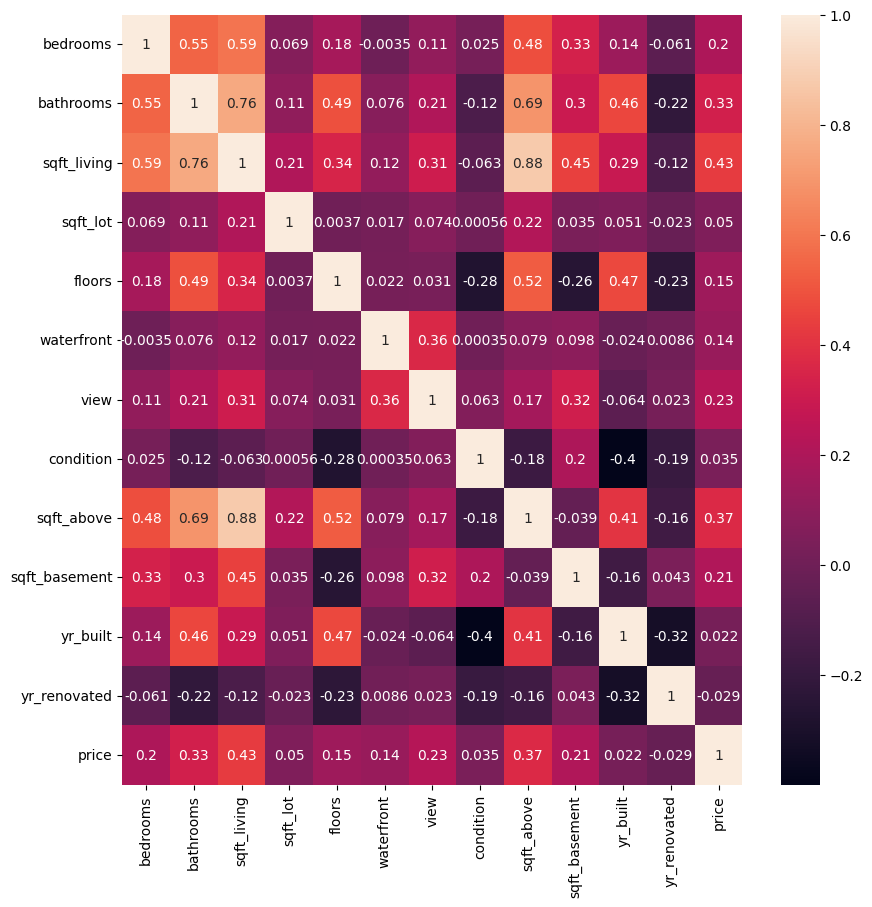

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(), annot=True)
plt.show()

In [47]:
x=dataset.iloc[:,:-1]
y=dataset['price']

In [48]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x), columns=x.columns)
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464,-0.531014,1.221670
1,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,4.830079,2.286416,1.789559,-0.069128,-1.674693,-0.825693
2,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,-0.309194,0.809652,0.119171,-0.672464,-0.161000,-0.825693
3,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,-0.959621,1.482306,-0.261913,-0.825693
4,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,-0.797222,1.051352,0.175376,1.208396
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.441122,-0.524202,-0.653458,-0.236689,-0.951388,-0.085004,-0.309194,0.809652,-0.368025,-0.672464,-0.564651,1.195121
4596,-0.441122,0.432802,-0.705374,-0.202882,0.906555,-0.085004,-0.309194,-0.667112,-0.426025,-0.672464,0.410840,1.225755
4597,-0.441122,0.432802,0.904009,-0.218462,0.906555,-0.085004,-0.309194,-0.667112,1.371962,-0.672464,1.285418,-0.825693
4598,0.659291,-0.205201,-0.051238,-0.229164,-0.951388,-0.085004,-0.309194,-0.667112,-0.878421,1.525401,0.108101,-0.825693


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# **LinearRegression**

In [50]:
from sklearn.linear_model import LinearRegression , Lasso, Ridge
lr=LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)*100

3.228385663270661

In [69]:
print( "Mean Squared Error",     mean_squared_error(y_test, lr.predict(x_test)))

Mean Squared Error 986921767056.1217


In [66]:
print( "Mean Absolute Error"  , mean_absolute_error(y_test, lr.predict(x_test)))

Mean Absolute Error 210908.17324983896


In [65]:
print( "Root Square Value"  , np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))

Root Square Value 993439.3625461605


In [51]:
lr.coef_

array([-58612.02450809,  28620.91876252, 137630.25418389, -18457.45554189,
        37581.76040751,  32277.52943856,  34834.37139825,  19864.74096006,
       120697.08870061,  61415.30012411, -76377.67737856,   8089.00372624])

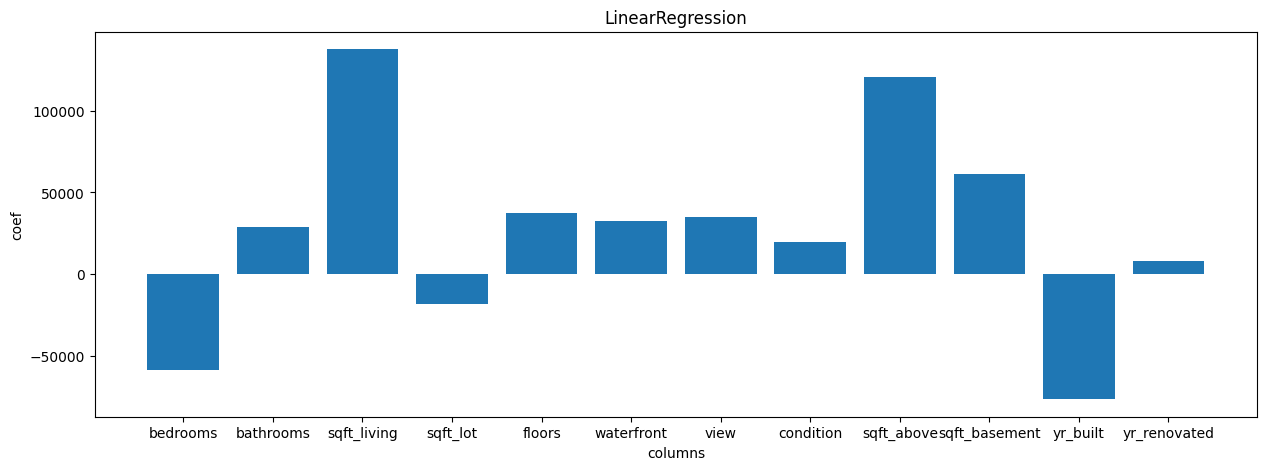

In [53]:
plt.figure(figsize=(15, 5))
plt.bar(x.columns, lr.coef_)
plt.title("LinearRegression")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

# **Lasso**

In [55]:
la=Lasso()
la.fit(x_train, y_train)
la.score(x_test, y_test)*100

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+13, tolerance: 5.229e+10
  model = cd_fast.enet_coordinate_descent(


3.2283370944623524

In [70]:
print( "Mean Squared Error",     mean_squared_error(y_test, la.predict(x_test)))
print( "Mean Absolute Error"  , mean_absolute_error(y_test, la.predict(x_test)))
print( "Root Square Value"  , np.sqrt(mean_squared_error(y_test, la.predict(x_test))))

Mean Squared Error 986922262383.3357
Mean Absolute Error 210908.29583029845
Root Square Value 993439.6118452976


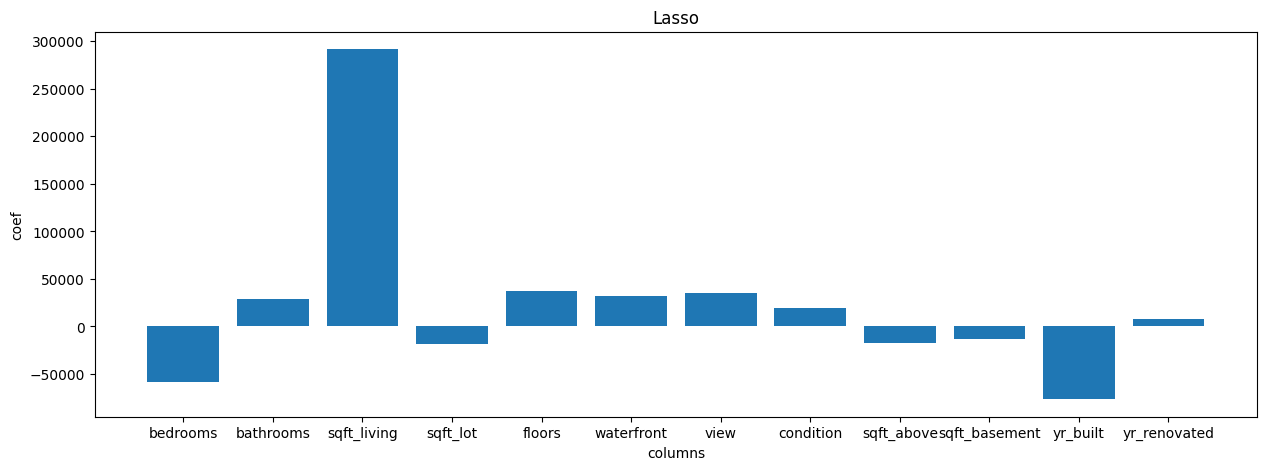

In [57]:
plt.figure(figsize=(15,5))
plt.bar(x.columns, la.coef_)
plt.title("Lasso")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

# **Ridge**

In [59]:
ri=Ridge(alpha=10)
ri.fit(x_train, y_train)
ri.score(x_test, y_test)*100

3.24019941712842

In [71]:
print( "Mean Squared Error",     mean_squared_error(y_test, ri.predict(x_test)))
print( "Mean Absolute Error"  , mean_absolute_error(y_test, ri.predict(x_test)))
print( "Root Square Value"  , np.sqrt(mean_squared_error(y_test, ri.predict(x_test))))

Mean Squared Error 986801284919.7765
Mean Absolute Error 210815.94787357954
Root Square Value 993378.7217973699


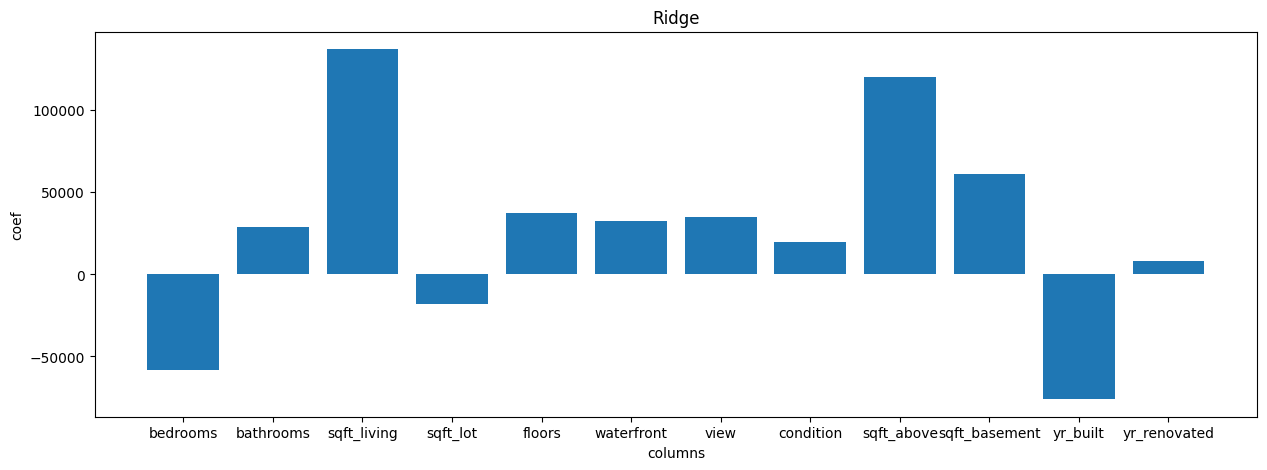

In [60]:
plt.figure(figsize=(15,5))
plt.bar(x.columns, ri.coef_)
plt.title("Ridge")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [73]:
# comparing

df=pd.DataFrame({"col_name":x.columns, "LinearRegression":lr.coef_, "Lasso":la.coef_, "Ridge":ri.coef_})
df

,col_name,LinearRegression,Lasso,Ridge
0,bedrooms,-58612.024508,-58610.780586,-58006.052994
1,bathrooms,28620.918763,28614.194509,28878.686086
2,sqft_living,137630.254184,291536.588461,137085.109644
3,sqft_lot,-18457.455542,-18456.309174,-18298.877275
4,floors,37581.760408,37582.087275,37445.130830
5,waterfront,32277.529439,32276.876655,32264.182806
6,view,34834.371398,34833.985949,34968.321859
7,condition,19864.740960,19863.099281,19870.905664
8,sqft_above,120697.088701,-17061.211245,120223.632684
9,sqft_basement,61415.300124,-12743.337216,61163.461025
